In [1]:
%load_ext rpy2.ipython
import rpy2
from rpy2.robjects.packages import importr

import pandas as pd

# PCA/AFDM

## Analyse factorielle de données mixtes

L'ACP n'est pas recommandée si l'on utilise des types de données mixtes. Nous suivrons ici la méthode recommandée. Nous poursuivrons ensuite avec une ACP traditionnelle. Dans ce cas particulier, l'augmentation de la dimensionnalité causée par les variables nominales peut ne pas être un problème.

_"L’introduction simultanée de variables quantitatives et qualitatives (donnéesdites mixtes) en tant qu’éléments actifs d’une même analyse factorielle est une problématique fréquente. La méthodologie usuelle consiste à transformer les variables quantitatives en qualitatives en découpant en classes leur intervalle de variation et à soumettre le tableau homogène ainsi obtenu à une analyse des correspondances multiples (ACM)"._ (_citation: Revue de statistique appliquée, tome 52, no 4 (2004), p. 93-111_)

Cette section est rédigée en R. Les données sont les mêmes que celles utilisées dans les sections précédentes.

### AFDM 5 dimensions

#### Valeurs Eigen et pourcentage cumulé de la variance

In [2]:
%%R
# install.packages('readr', repos='http://cran.us.r-project.org')
library(FactoMineR)
library(factoextra)
library(utils)

data <- read.csv('data/end_pipe/long_form_combined_formes.csv')
factored <- FAMD(data, graph=FALSE)
eig_val <- get_eigenvalue(factored)
print(eig_val)

      eigenvalue variance.percent cumulative.variance.percent
Dim.1   2.834187        10.900719                    10.90072
Dim.2   2.351375         9.043749                    19.94447
Dim.3   1.910707         7.348872                    27.29334
Dim.4   1.640780         6.310692                    33.60403
Dim.5   1.479060         5.688692                    39.29272


Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


#### Contribution des variables à chaque dimension

In [3]:
%%R
library(FactoMineR)
library(factoextra)
library(utils)
library(ggpubr)

data <- read.csv('data/end_pipe/long_form_combined_formes.csv')
factored <- FAMD(data, graph=FALSE)
eig_val <- get_eigenvalue(factored)

var <- get_famd_var(factored)
var$contrib

                     Dim.1       Dim.2     Dim.3      Dim.4      Dim.5
compte         0.132171501  0.75577112 14.940928  6.3721600  0.2684539
orientation   21.265266860 24.75551925 40.212229 44.1467456 52.9697014
substrat      22.764649136 24.35576747  6.603517 36.0987437 10.0909711
frequentation 26.739573670 29.13302885  1.626798  1.0864136  1.9338653
situation      7.117996649  6.99872423 15.099331  0.9871031  1.1329101
distance      21.975235000 13.94739065 19.175388  9.2913973 33.4520360
objet          0.005107184  0.05379842  2.341808  2.0174367  0.1520621


#### Les individus ayant des profils similaires sont proches les uns des autres sur la carte des facteurs.

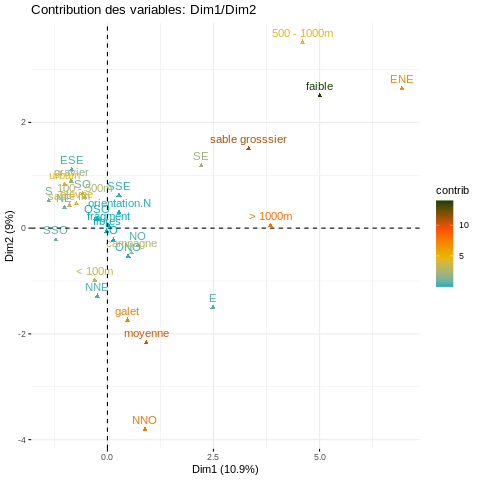

In [4]:
%%R
library(FactoMineR)
library(factoextra)
library(utils)
library(ggpubr)

data <- read.csv('data/end_pipe/long_form_combined_formes.csv')
factored <- FAMD(data, ncp = 5, graph=FALSE)

quali.var <- get_famd_var(factored, "quali.var")
fviz_famd_var(factored, "quali.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07", "#1B3E07"),
             title="Contribution des variables: Dim1/Dim2"
             )

### AFDM 2 dimensions

#### Valeurs Eigen et pourcentage cumulé de la variance

In [5]:
%%R
library(FactoMineR)
library(factoextra)
library(utils)
library(ggpubr)

data <- read.csv('data/end_pipe/long_form_combined_formes.csv')
factored <- FAMD(data, ncp = 2, graph=FALSE)

eig_val <- get_eigenvalue(factored)

print(eig_val)

      eigenvalue variance.percent cumulative.variance.percent
Dim.1   2.834187        10.900719                    10.90072
Dim.2   2.351375         9.043749                    19.94447


#### Contribution des variables à chaque dimension

In [6]:
%%R
library(FactoMineR)
library(factoextra)
library(utils)
library(ggpubr)

data <- read.csv('data/end_pipe/long_form_combined_formes.csv')
factored <- FAMD(data, ncp = 2, graph=FALSE)

var <- get_famd_var(factored)
var$contrib

                     Dim.1       Dim.2
compte         0.132171501  0.75577112
orientation   21.265266860 24.75551925
substrat      22.764649136 24.35576747
frequentation 26.739573670 29.13302885
situation      7.117996649  6.99872423
distance      21.975235000 13.94739065
objet          0.005107184  0.05379842


#### Les individus ayant des profils similaires sont proches les uns des autres sur la carte des facteurs.

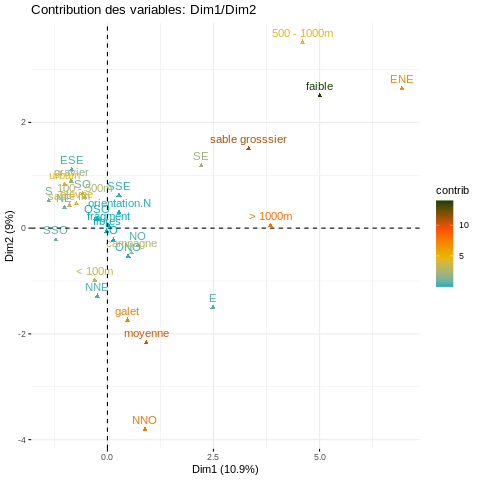

In [7]:
%%R
library(FactoMineR)
library(factoextra)
library(utils)
library(ggpubr)

data <- read.csv('data/end_pipe/long_form_combined_formes.csv')
factored <- FAMD(data, ncp = 2, graph=FALSE)

quali.var <- get_famd_var(factored, "quali.var")
fviz_famd_var(factored, "quali.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07", "#1B3E07"),
             title="Contribution des variables: Dim1/Dim2",
             )

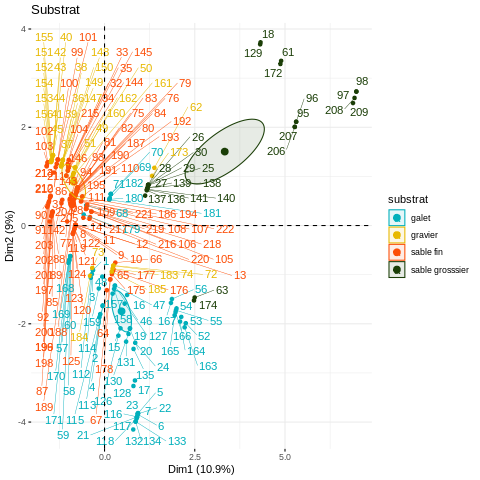

In [8]:
%%R
library(FactoMineR)
library(factoextra)
library(utils)
library(ggpubr)

data <- read.csv('data/end_pipe/long_form_combined_formes.csv')
factored <- FAMD(data, ncp = 2, graph=FALSE)

substrat <- fviz_mfa_ind(factored, 
             habillage = "substrat", # color by groups 
             palette = c("#00AFBB", "#E7B800", "#FC4E07", "#1B3E07"),
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE,
             title = "Substrat"
            
             )

substrat

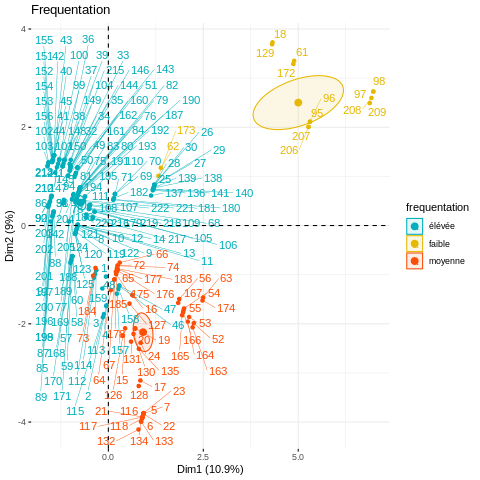

In [9]:
%%R
library(FactoMineR)
library(factoextra)
library(utils)
library(ggpubr)

data <- read.csv('data/end_pipe/long_form_combined_formes.csv')
factored <- FAMD(data, ncp = 2, graph=FALSE)

freq <- fviz_mfa_ind(factored, 
             habillage = "frequentation", # color by groups 
             palette = c("#00AFBB", "#E7B800", "#FC4E07", "#1B3E07"),
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE,
             title="Frequentation"
             
             )


freq

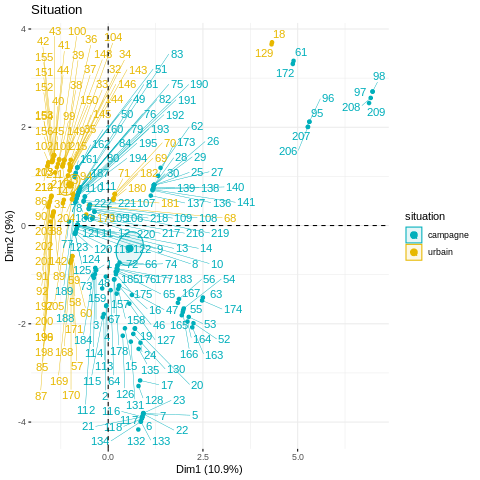

In [10]:
%%R
library(FactoMineR)
library(factoextra)
library(utils)
library(ggpubr)

data <- read.csv('data/end_pipe/long_form_combined_formes.csv')
factored <- FAMD(data, ncp = 2, graph=FALSE)

situation <- fviz_mfa_ind(factored, 
             habillage = "situation", # color by groups 
             palette = c("#00AFBB", "#E7B800", "#FC4E07", "#1B3E07"),
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE,
             title = "Situation"
             
             ) 



situation

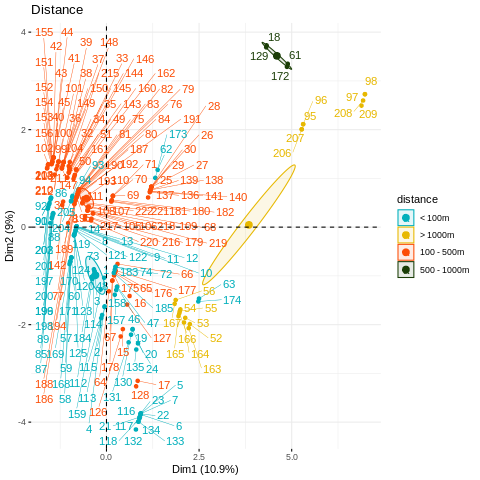

In [11]:
%%R
library(FactoMineR)
library(factoextra)
library(utils)
library(ggpubr)

data <- read.csv('data/end_pipe/long_form_combined_formes.csv')
factored <- FAMD(data, ncp = 2, graph=FALSE)

distance <- fviz_mfa_ind(factored, 
             habillage = "distance", # color by groups 
             palette = c("#00AFBB", "#E7B800", "#FC4E07", "#1B3E07"),
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE,
             title = "Distance"
            
                
             )


distance